In [44]:
import pandas as pd
from collections import defaultdict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
%pylab inline

folder = '/home/jgf/git/Empirical/examples/evo/concept/taild/grid-pools-subgrid-size-sweep/'

num_reps = 10
base_template = "{tlf}{parb}{paropt}/{struct}-{rep}-quorum-map.csv.taild.csv"
options = [5, 10, 15, 20, 30, 60]
parent_base = 'SUBGRID_SIZE_'

# make a 2d array where the cols are each of the treatments and the 
# rows are just entires stripped from the options stuff

def rotate(l,n):
    return l[n:] + l[:n]

loaded_base = []
for opt in options:
    loaded_reps = []
    for replicant in range(0, num_reps):
        with open(base_template.format(
                                        tlf=folder,
                                        parb=parent_base,
                                        paropt=opt,
                                        struct='grid-pools-quorum.out',
                                        rep=replicant)) as file:
            line = file.readline().split(" ", 1)[1]
            line = re.sub("[\[\]{{}},]", '', line)
            
            chopped = line.split()
            for el in chopped:
                if int(el) != -1:
                    loaded_reps.append(int(el))
    # now we have a list of all the chars from the thing
    loaded_base.append(loaded_reps)
    loaded_reps = []

loaded_base

flipped = []
df = pd.DataFrame(loaded_base, options)

df.head()

df = df.T
df


Populating the interactive namespace from numpy and matplotlib


,5,10,15,20,30,60
0,100.0,100.0,57.0,49.0,42.0,45.0
1,99.0,100.0,56.0,30.0,46.0,51.0
2,96.0,78.0,51.0,29.0,47.0,45.0
3,97.0,79.0,47.0,30.0,46.0,41.0
4,99.0,78.0,51.0,41.0,46.0,40.0
5,94.0,77.0,58.0,57.0,46.0,54.0
6,95.0,77.0,37.0,56.0,45.0,40.0
7,96.0,80.0,38.0,39.0,44.0,57.0
8,97.0,76.0,57.0,57.0,42.0,35.0
9,86.0,81.0,59.0,39.0,39.0,50.0


/home/jgf/anaconda3/envs/pyaims/lib/python3.5/site-packages/seaborn/categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


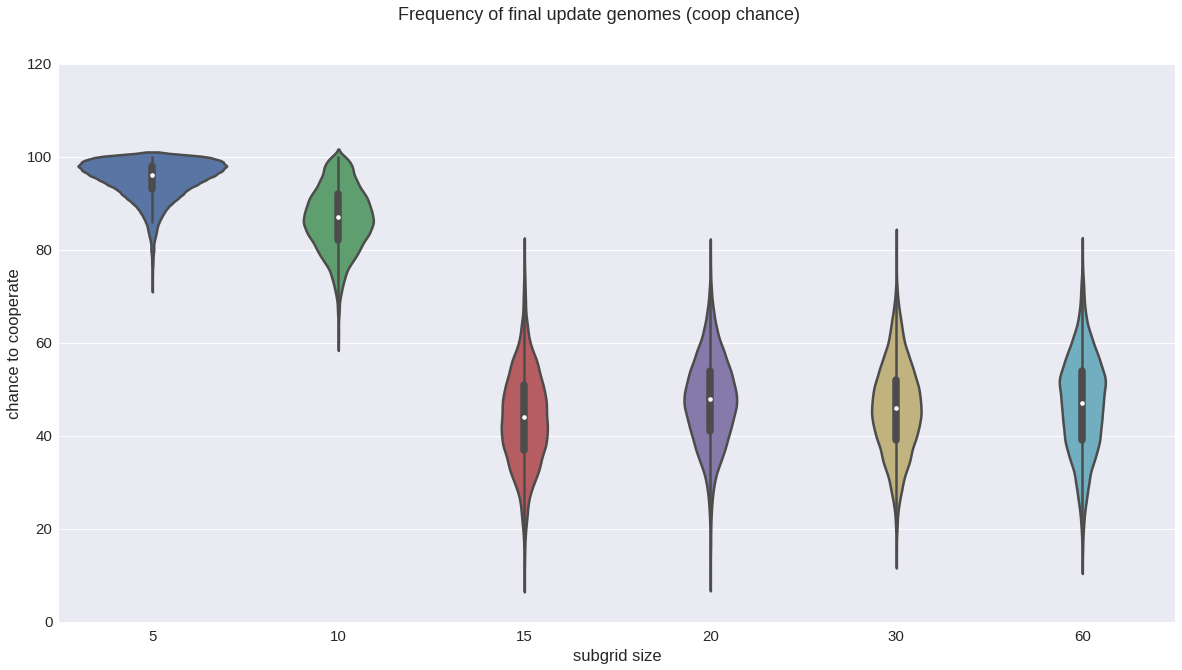

In [52]:
pylab.rcParams['figure.figsize'] = (20, 10)

sns.plt.suptitle("Frequency of final update genomes (coop chance)")
plt.subplots_adjust(top=0.9)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

ax = sns.violinplot(df[options])
ax.set(xlabel="subgrid size", ylabel="chance to cooperate")
